# Saving and loading sunpy Maps with asdf

- https://docs.sunpy.org/en/stable/generated/gallery/saving_and_loading_data/genericmap_in_asdf.html

In this example we are going to look at how we can save and load a
`sunpy.map.GenericMap` with [asdf](https://asdf.readthedocs.io/en/latest/).

asdf is a modern file format designed to meet the needs of the astronomy
community. It has deep integration with Python, SunPy and Astropy as well as
implementations in other languages. It can be used to store known Python
objects in a portable, well defined file format. It is primarily useful for
storing complex Astropy and SunPy objects in a way that can be loaded back into
the same form as they were saved.

Here, even though we will be working with `sunpy.map.sources.sdo.AIAMap`
specifically, the process can be extended to any `sunpy.map.GenericMap`,
including ones created using custom FITS files.

In [ ]:
import asdf
import astropy.units as u

import sunpy.data.sample
import sunpy.map

We begin by creating an `sunpy.map.sources.sdo.AIAMap` object using the
sample data.

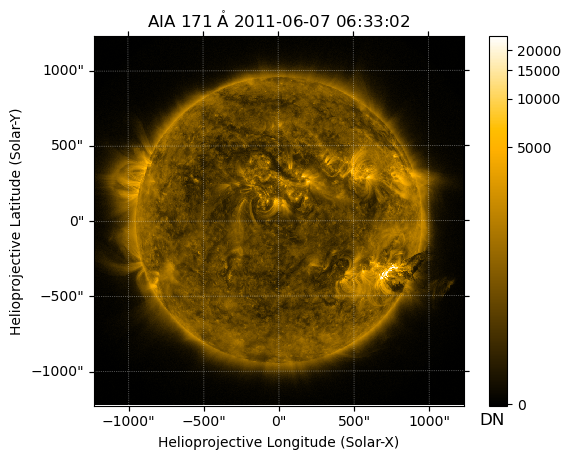

In [ ]:
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia_map.peek(clip_interval=(1, 99.99)*u.percent)

We can now save this object to an asdf file to use later. Saving it like this
allows us to preserve all of the metadata of the object along with the actual
array data. When we load the asdf again, we get an identical
`sunpy.map.sources.sdo.AIAMap` object.

asdf files work by saving a dictionary internally, so to save the object we
need to put it into a dictionary. This becomes what asdf calls a "tree".

In [ ]:
tree = {'aia_map': aia_map}

We can now write the data to an asdf file like so:

In [ ]:
with asdf.AsdfFile(tree) as asdf_file:
    asdf_file.write_to("sunpy_map.asdf")

This asdf file is a portable file and can be safely loaded by anyone with
Astropy, sunpy and asdf installed. We can reload it like so:

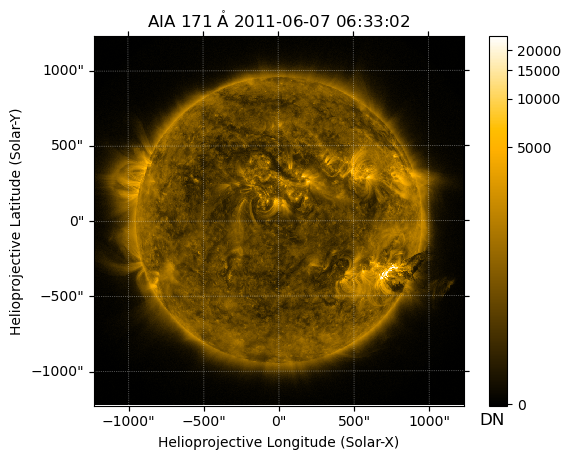

In [ ]:
with asdf.open("sunpy_map.asdf") as asdf_file:
    reloaded_aia_map = asdf_file['aia_map']
    reloaded_aia_map.peek(clip_interval=(1, 99.99)*u.percent)